# **Participant 08 Data Analysis**

## Introduction

Author: Aashika Agarwal

Goal: In this process notebook, we would explore the Participant08 dataset.

About the dataset: This dataset contains the step count for a participant from January 1, 2022 till September 12, 2022. This data was creted by users using the Apple Health app. Secveral participants were mailed by DATA3406 teaching staff for the data, the ones who gave consent used the app to send over the data. We are gpoing to look at the dataset provided by one such participant. We do not have much personal information about the participant under consideration.

## Initial Data Analysis

### Importing Packages

We will now import the packages that we would need for data exploration

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

### Reading the datasets

Reading the csv file, and storing the data into a DataFrame.

In [3]:
data = pd.read_csv('Participant-08.csv') # reading the CSV file

Now, lets have an initial look at the dataset.

In [4]:
data # printing the data

,Start,Finish,Steps (count)
0,01-Jan-2022 00:00,01-Jan-2022 01:00,0.0
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0
...,...,...,...
6100,12-Sep-2022 03:00,12-Sep-2022 04:00,0.0
6101,12-Sep-2022 04:00,12-Sep-2022 05:00,0.0
6102,12-Sep-2022 05:00,12-Sep-2022 06:00,25.0
6103,12-Sep-2022 06:00,12-Sep-2022 07:00,0.0


We can see that the data has loaded into a dataframe appropriately. It has 6105 rows, and 3 columns. The columns are called "Start", "Finish", and "Steps (count)". The start and finish column refer to the time for which the corresponsing step counts has been recorded.



### Cleaning the dataset

The first thing that we are going to do is check the data type of each variable.

In [5]:
data.dtypes # finding the data types for each column

Start             object
Finish            object
Steps (count)    float64
dtype: object

We can see that the start and finish columns are of type object, while step count is of type float64. We will convert start and finish to a datetime object so that we can access the day, date, month, year, and time attribute for each row.

In [6]:
data['Start'] =  pd.to_datetime(data['Start']) # changing Start column from object to datetime data type
data['Finish'] =  pd.to_datetime(data['Finish']) # changing Finsih column from object to datetime data type
data # printing the data

,Start,Finish,Steps (count)
0,2022-01-01 00:00:00,2022-01-01 01:00:00,0.0
1,2022-01-01 01:00:00,2022-01-01 02:00:00,0.0
2,2022-01-01 02:00:00,2022-01-01 03:00:00,0.0
3,2022-01-01 03:00:00,2022-01-01 04:00:00,0.0
4,2022-01-01 04:00:00,2022-01-01 05:00:00,0.0
...,...,...,...
6100,2022-09-12 03:00:00,2022-09-12 04:00:00,0.0
6101,2022-09-12 04:00:00,2022-09-12 05:00:00,0.0
6102,2022-09-12 05:00:00,2022-09-12 06:00:00,25.0
6103,2022-09-12 06:00:00,2022-09-12 07:00:00,0.0


From the above output, we can see that the data has been converted appropriately to a datetime format. Now we can access each and every date and time attribute separately for analysis.

Now, we are going to see if there are any missing values in the dataset.

In [7]:
data.isnull().values.any() # checking if there are any missing values

False

We can see above that the dataset has no NA values. But so that the code works for any dataset, we will add code to remove all missing values. The reason why we will remove missing values is because, if we do not have start or end time, or step count then we cannot analyse that information properly.

In [8]:
data.dropna() # dropping all the NA values from dataset

,Start,Finish,Steps (count)
0,2022-01-01 00:00:00,2022-01-01 01:00:00,0.0
1,2022-01-01 01:00:00,2022-01-01 02:00:00,0.0
2,2022-01-01 02:00:00,2022-01-01 03:00:00,0.0
3,2022-01-01 03:00:00,2022-01-01 04:00:00,0.0
4,2022-01-01 04:00:00,2022-01-01 05:00:00,0.0
...,...,...,...
6100,2022-09-12 03:00:00,2022-09-12 04:00:00,0.0
6101,2022-09-12 04:00:00,2022-09-12 05:00:00,0.0
6102,2022-09-12 05:00:00,2022-09-12 06:00:00,25.0
6103,2022-09-12 06:00:00,2022-09-12 07:00:00,0.0


As there were no missing values, we can see that the dataset still has 6105 rows and 3 columns.



### Exploring a single variable: step count

The first thing that we are going to do is exploring the variable: stepcount. We will look at the mean of step count, the maximum and minimum count, standard devaition, and the inter quartile ranges.

In [9]:
data['Steps (count)'].describe() # checking the details for step count column

count    6105.000000
mean      361.618018
std       739.659887
min         0.000000
25%         0.000000
50%        46.000000
75%       338.000000
max      6379.000000
Name: Steps (count), dtype: float64

We can see that the mean number of steps for the given time period is 361.6 and maximum number of steps have been 6379. We can also observe that a lot of step counts are 0. The 0 step counts can give us insight into how often users do not carry the apple device with them. Now, lets have a look at the box plot for the step count.




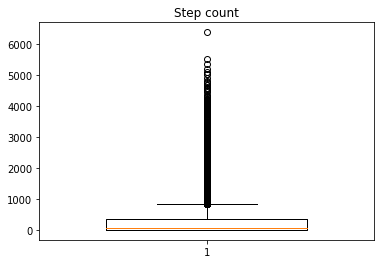

In [10]:
plt.boxplot(data['Steps (count)'], widths = 0.6) # creating box plot
plt.title('Step count')
plt.show()

Looking at the above box plot, we can see that there a lot of outliers in our dataset. Lets find the number of outliers now.

In [11]:
q1=data['Steps (count)'].quantile(0.25) # finding first quartile
q3=data['Steps (count)'].quantile(0.75) # finding thrid quartile
IQR=q3-q1 # finding inter quartile range
outliers = data['Steps (count)'][((data['Steps (count)']<(q1-1.5*IQR)) | (data['Steps (count)']>(q3+1.5*IQR)))] # finding outliers
outliers # printing outliers

16      3753.000000
17      2554.000000
34      1143.888080
35      2053.358474
42      3220.000000
           ...     
6061    1784.878987
6064    2521.000000
6065    1166.000000
6084    1815.293098
6085     872.103840
Name: Steps (count), Length: 779, dtype: float64

We can see that there are 779 outliers. 

### Exploring the start and finish time

Now lets add a colum to the table which will denote the time period covered between the start and finish time.

In [12]:
data['Time'] = data['Finish'] - data['Start'] # creting a new column which stores the time period for each row
data

,Start,Finish,Steps (count),Time
0,2022-01-01 00:00:00,2022-01-01 01:00:00,0.0,0 days 01:00:00
1,2022-01-01 01:00:00,2022-01-01 02:00:00,0.0,0 days 01:00:00
2,2022-01-01 02:00:00,2022-01-01 03:00:00,0.0,0 days 01:00:00
3,2022-01-01 03:00:00,2022-01-01 04:00:00,0.0,0 days 01:00:00
4,2022-01-01 04:00:00,2022-01-01 05:00:00,0.0,0 days 01:00:00
...,...,...,...,...
6100,2022-09-12 03:00:00,2022-09-12 04:00:00,0.0,0 days 01:00:00
6101,2022-09-12 04:00:00,2022-09-12 05:00:00,0.0,0 days 01:00:00
6102,2022-09-12 05:00:00,2022-09-12 06:00:00,25.0,0 days 01:00:00
6103,2022-09-12 06:00:00,2022-09-12 07:00:00,0.0,0 days 01:00:00


Looking above, we can observe that each time period corresponds to one hour of the day. Now, lets combine the rows for one day, and see the step count recorded for each month. For this, we will add a column called month to the dataset.

In [13]:
data["month"] = data["Start"].dt.month # finding month corresponding to each row
data

,Start,Finish,Steps (count),Time,month
0,2022-01-01 00:00:00,2022-01-01 01:00:00,0.0,0 days 01:00:00,1
1,2022-01-01 01:00:00,2022-01-01 02:00:00,0.0,0 days 01:00:00,1
2,2022-01-01 02:00:00,2022-01-01 03:00:00,0.0,0 days 01:00:00,1
3,2022-01-01 03:00:00,2022-01-01 04:00:00,0.0,0 days 01:00:00,1
4,2022-01-01 04:00:00,2022-01-01 05:00:00,0.0,0 days 01:00:00,1
...,...,...,...,...,...
6100,2022-09-12 03:00:00,2022-09-12 04:00:00,0.0,0 days 01:00:00,9
6101,2022-09-12 04:00:00,2022-09-12 05:00:00,0.0,0 days 01:00:00,9
6102,2022-09-12 05:00:00,2022-09-12 06:00:00,25.0,0 days 01:00:00,9
6103,2022-09-12 06:00:00,2022-09-12 07:00:00,0.0,0 days 01:00:00,9


Now that we have the month, lets combine the step count for each month.

In [14]:
monthlyCount = [] # creating a list for month counts
for i in range(1, 13): # looping through each month
  filt = data['month'] == i # filtering rows for each month
  res = data.loc[filt].sum(axis=0, numeric_only=True) # filtering rows for each month and finding sum of step count
  monthlyCount.append(res[0]) # adding monthly step count to list
  print(i, res[0]) # printing results

1 213809.0
2 245086.99999999994
3 264200.0
4 262138.0
5 299847.0
6 225709.99999999997
7 265860.0
8 297977.0
9 133050.0
10 0.0
11 0.0
12 0.0


We can see above that for months 10 to 12 i.e october to december the step count is 0 as expected because the data is not recorded for these months. Now lets look at the mean, standard deviation, and interquartile range for the step count for january to september.

In [15]:
monthlyCount = monthlyCount[0:9] # filtering all the monthly data for the months whose data was recorded
# IMP: this would only work for datasets where data is recorded only till september, which includes all other participant datasets
monthlyData = pd.DataFrame(monthlyCount) # converting monthly step counts to data frame
monthlyData.columns = ['count'] # renaming columns
monthlyData.describe() # finding aggregation details for the monthly step counts


,count
count,9.000000
mean,245297.555556
std,50977.007536
min,133050.000000
25%,225710.000000
50%,262138.000000
75%,265860.000000
max,299847.000000


We can observe that the mean number of steps for every month is 245297.5, and the maximum number of steps recorded are 299847. Now lets have a look at the boxplot.

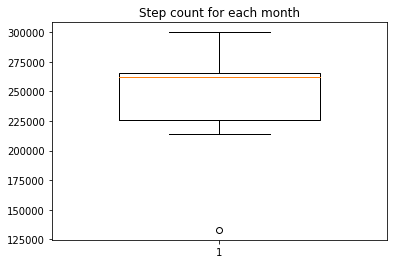

In [16]:
plt.boxplot(monthlyData['count'], widths = 0.6) # creating box plot
plt.title('Step count for each month')
plt.show()

Looking at the above plat, we can see that there is only one outlier in the monthly count dataset.

### Data Visualisation

Now, lets create a visualisation to observe how the step count changes over time.

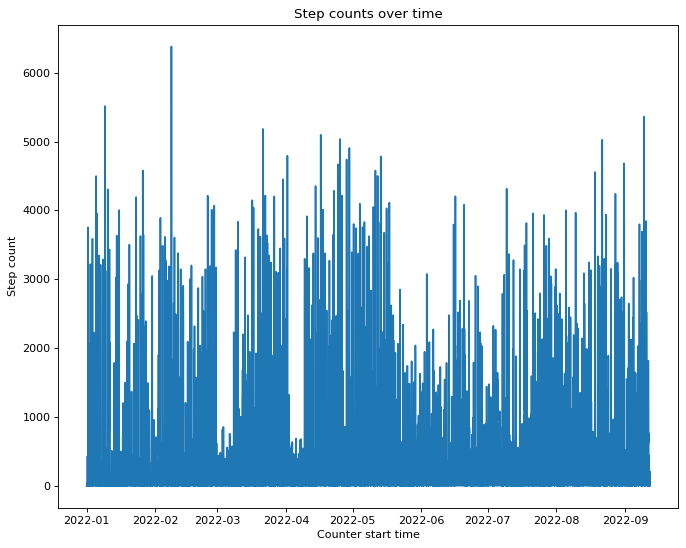

In [17]:
figure(figsize=(10, 8), dpi=80) # setting figure size
plt.plot(data['Start'], data['Steps (count)']) # creating plot
# adding a and y axis labels and title
plt.xlabel('Counter start time')
plt.ylabel("Step count")
plt.title('Step counts over time')
plt.show()

            Steps (count)
date                     
2022-01-01         7312.0
2022-01-02         7661.0
2022-01-03         6462.0
2022-01-04         5454.0
2022-01-05         8658.0
...                   ...
2022-09-08        18149.0
2022-09-09        17792.0
2022-09-10        14373.0
2022-09-11         5636.0
2022-09-12          228.0

[255 rows x 1 columns]
255


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<AxesSubplot:xlabel='date', ylabel='Steps (count)'>

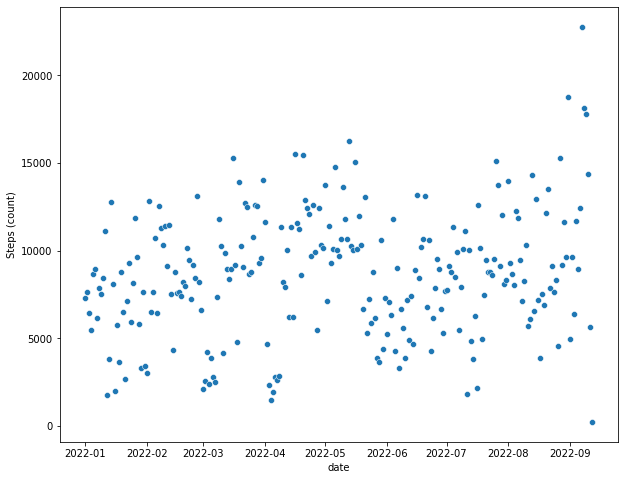

In [18]:
import seaborn as sns
new_data = data[['Start', 'Steps (count)']]
#add a new column containing only the date
new_data['date'] = new_data['Start'].dt.date
#find sum of steps for each date
new_data = new_data.groupby('date').sum()
print(new_data)
#plot a scatter of the Step count and date
fig = plt.figure(figsize=(10,8))
print(len(new_data))
sns.scatterplot(x=new_data.index, y=new_data['Steps (count)'])


In [37]:
#find the mean of steps for each weekday and weekend for each month
new_data['weekday'] = new_data.apply(lambda x: 1 if x.name.weekday() < 5 else 0, axis=1)
def get_month(x):
    return x.month
results = new_data.groupby([new_data.index.map(get_month), 'weekday']).mean()
results

Steps (count)
date weekday               
1    0          6791.700000
     1          6947.238095
2    0          9206.125000
     1          8571.900000
3    0          9128.875000
     1          8311.695652
4    0          9526.111111
     1          8400.142857
5    0          9602.444444
     1          9701.136364
6    0          8305.750000
     1          7239.272727
7    0          8773.200000
     1          8482.285714
8    0         11532.125000
     1          8944.347826
9    0          9524.750000
     1         11868.875000

In [38]:
#change date to respective month of the year
results.index = results.index.set_levels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'], level=0)
results

Steps (count)
date weekday               
Jan  0          6791.700000
     1          6947.238095
Feb  0          9206.125000
     1          8571.900000
Mar  0          9128.875000
     1          8311.695652
Apr  0          9526.111111
     1          8400.142857
May  0          9602.444444
     1          9701.136364
Jun  0          8305.750000
     1          7239.272727
Jul  0          8773.200000
     1          8482.285714
Aug  0         11532.125000
     1          8944.347826
Sep  0          9524.750000
     1         11868.875000

<AxesSubplot:title={'center':'Mean of steps for each weekday and weekend for each month'}, xlabel='date'>

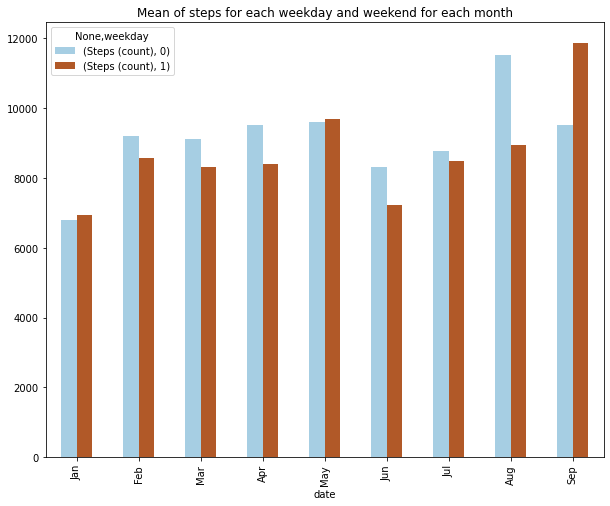

In [51]:
#plot the bar chart of the mean of steps for each weekday and weekend for each month
results.unstack().plot(kind='bar', figsize=(10,8), title='Mean of steps for each weekday and weekend for each month',legend=True,colormap='Paired')

<AxesSubplot:xlabel='date'>

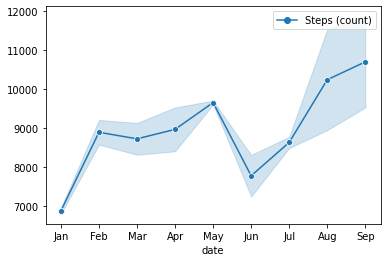

In [45]:
unstacked = results.unstack()
#plot the line chart of the mean of steps for each weekday and weekend for each month
sns.lineplot(data=unstacked, markers=True, dashes=False)

We can see that there is peak for a time period between february and march, but overall the step count is varying a lot. Now lets viaulise the step counts for each month.

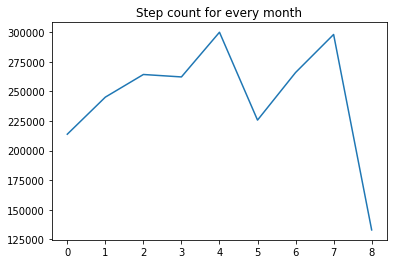

In [ ]:
plt.plot(monthlyData['count']) # creating plot
plt.title('Step count for every month')
plt.show()

We can see that the step count is least for month 8 which corresponds to september which is expected because we only have data till 12th of September. We acn also observe that there is a peak for step count in may, and august. We can see that there was a sudden drop in step count from may to june, which can indicate some change in weather or enviroment which might lead to a drop in physical activity levels.

It would be beneficial to analyse the sudden dip in activity level in june and september.



## Sub-question: trends in physical activity for each month during weekdays and weekends.

To analyse the trends between weekdays and weekends, we will first add a day column to the dataset.

In [ ]:
data["day"] = data["Start"].dt.weekday # finding month corresponding to each row
data

,Start,Finish,Steps (count),Time,month,day
0,2022-01-01 00:00:00,2022-01-01 01:00:00,0.0,0 days 01:00:00,1,5
1,2022-01-01 01:00:00,2022-01-01 02:00:00,0.0,0 days 01:00:00,1,5
2,2022-01-01 02:00:00,2022-01-01 03:00:00,0.0,0 days 01:00:00,1,5
3,2022-01-01 03:00:00,2022-01-01 04:00:00,0.0,0 days 01:00:00,1,5
4,2022-01-01 04:00:00,2022-01-01 05:00:00,0.0,0 days 01:00:00,1,5
...,...,...,...,...,...,...
6100,2022-09-12 03:00:00,2022-09-12 04:00:00,0.0,0 days 01:00:00,9,0
6101,2022-09-12 04:00:00,2022-09-12 05:00:00,0.0,0 days 01:00:00,9,0
6102,2022-09-12 05:00:00,2022-09-12 06:00:00,25.0,0 days 01:00:00,9,0
6103,2022-09-12 06:00:00,2022-09-12 07:00:00,0.0,0 days 01:00:00,9,0


We can see above that now we have a day column with numbers ranging from 0 to 6, where 0 refers to monday, 1 refers to tuesday, 2 refers to wednesday, 3 refers to thursday, 4 refers to friday, 5 refers to saturday, and 6 refers to sunday. Now, we are going to find the sum of step counts for each weekday and each weekend for a month.

In [ ]:
monthlyWeekday = []
monthlyWeekend = []
for j in range(1, 10):
  weekdayCount = 0 # creating a list for weekday counts for each month
  weekendCount = 0 # creating a list for weekend counts for each month
  filtered = data[(data['month'] == j) & (data['day'] < 7)]
  for i in range(0, 6): # looping through each weekday
    filt = filtered['day'] == i # filtering rows for each weekday
    res = filtered.loc[filt].sum(axis=0, numeric_only=True) # filtering rows for each weekday and finding sum of step count
    weekdayCount += res[0]
  for i in range(5, 7): # looping through each weekend
    filt = filtered['day'] == i # filtering rows for each weekend
    res = filtered.loc[filt].sum(axis=0, numeric_only=True) # filtering rows for each weekend and finding sum of step count
    weekendCount += res[0]
  monthlyWeekday.append(weekdayCount/5) # adding the average step count
  monthlyWeekend.append(weekendCount/5) # adding the average step count
print(monthlyWeekday)
print(monthlyWeekend)

[35931.99999999999, 42987.2, 45922.0, 46046.6, 50086.2, 39268.0, 43277.4, 51867.4, 23147.4]
[13583.4, 14729.799999999997, 14606.2, 17147.0, 17284.4, 13289.2, 17546.399999999998, 18451.4, 7619.8]


The above results show the average number of steps for weekdays and weekends for each month.

Now, I am going to add these results to a dataset.

In [ ]:
# IMP: this would only work for datasets where data is recorded only till september, which includes all other participant datasets
index = [0, 1, 2, 3, 4, 5, 6, 7, 8]
weekRes = {"month":index, "weekday":monthlyWeekday ,"weekend":monthlyWeekend}
weeklyData = pd.DataFrame(weekRes) # converting monthly step counts to data frame
print(weeklyData)

   month  weekday  weekend
0      0  35932.0  13583.4
1      1  42987.2  14729.8
2      2  45922.0  14606.2
3      3  46046.6  17147.0
4      4  50086.2  17284.4
5      5  39268.0  13289.2
6      6  43277.4  17546.4
7      7  51867.4  18451.4
8      8  23147.4   7619.8


The above results show the average step counts for weekday and weekends for each month.

Now, I am going to create a bar plot which would show the step counts for each month.

<AxesSubplot:title={'center':'Average weekday and weekend step count for each month'}, xlabel='month'>

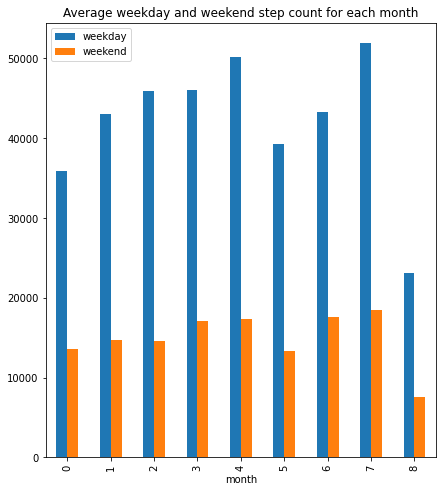

In [ ]:
weeklyData[['month', 'weekday', 'weekend']].plot(x='month', kind='bar', figsize=(7,8), title = "Average weekday and weekend step count for each month")

From the above plot we can notice that for each month the average number of step counts for weekday is way higher than the average step count for weekends.

### Hypothesis test to confirm the results



In order to be sure if these means are significantly different or not, we would perform a hypothesis test.

The first thing that we are going to do for this is create a new dataset with column for each month, and each row corresponding to the step count for each weekday for that particular month. Similarly we would create a new dataset for weekends.

In [ ]:
# weekdayMeans = weeklyData["weekday"].values.tolist()
monthlyWeekday = []
monthlyWeekend = []
for j in range(1, 10):
  weekdayCount = [] # creating a list for weekday counts for each month
  weekendCount = [] # creating a list for weekend counts for each month
  filtered = data[(data['month'] == j) & (data['day'] < 7)]
  for i in range(0, 6): # looping through each weekday
    filt = filtered['day'] == i # filtering rows for each weekday
    res = filtered.loc[filt].sum(axis=0, numeric_only=True) # filtering rows for each weekday and finding sum of step count
    weekdayCount.append(res[0])
  for i in range(5, 7): # looping through each weekend
    filt = filtered['day'] == i # filtering rows for each weekend
    res = filtered.loc[filt].sum(axis=0, numeric_only=True) # filtering rows for each weekend and finding sum of step count
    weekendCount.append(res[0])
  monthlyWeekday.append(weekdayCount) # adding the average step count
  monthlyWeekend.append(weekendCount) # adding the average step count
# print(len(monthlyWeekday[0]))
# print(len(monthlyWeekday))
# print(monthlyWeekend)

weekdayDatasetList = []
# Create dataset for weekdays
for i in range(0,6):
  temp = []
  for j in range(0,9):
    temp.append(monthlyWeekday[j][i])
  weekdayDatasetList.append(temp)
weekdayDataset = pd.DataFrame(weekdayDatasetList, columns=['January','February','March','April','May','June','July','August','September'])
print(weekdayDataset)



   January  February    March    April      May     June     July   August  \
0  30075.0   33609.0  32530.0  33210.0  44522.0  38493.0  32863.0  53595.0   
1  28351.0   32557.0  40463.0  30487.0  48313.0  21467.0  38562.0  43441.0   
2  31052.0   37954.0  51631.0  29919.0  41851.0  36703.0  36032.0  49237.0   
3  28984.0   34727.0  46420.0  39327.0  37203.0  37785.0  27891.0  29604.0   
4  27430.0   32591.0  20125.0  43460.0  41536.0  24816.0  42780.0  29843.0   
5  33768.0   43498.0  38441.0  53830.0  37006.0  37076.0  38259.0  53617.0   

   September  
0     9175.0  
1    12428.0  
2    22769.0  
3    23133.0  
4    27446.0  
5    20786.0  


In [ ]:
weekendDatasetList = []
# Create dataset for weekdays
for i in range(0,2):
  temp = []
  for j in range(0,9):
    temp.append(monthlyWeekend[j][i])
  weekendDatasetList.append(temp)
weekendDataset = pd.DataFrame(weekendDatasetList, columns=['January','February','March','April','May','June','July','August','September'])
print(weekendDataset)

   January  February    March    April      May     June     July   August  \
0  33768.0   43498.0  38441.0  53830.0  37006.0  37076.0  38259.0  53617.0   
1  34149.0   30151.0  34590.0  31905.0  49416.0  29370.0  49473.0  38640.0   

   September  
0    20786.0  
1    17313.0  


From the above code, we can see that we have the dataset as described on top for both weekdays and weekends for each month.

Now for the weekday dataset, we know that all the observations are independent of each other, as they are all recorded on separate days using the pedometer app on phone. Now, lets draw a box plot to check the distribution of the data for each month.

<AxesSubplot:>

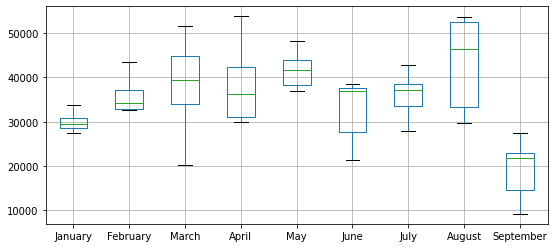

In [ ]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can easily detect the differences
# between different treatments
weekdayDataset.boxplot(figsize = (9, 4))

From the above boxplot we can see that the data is normally distributed, and the variances for each month are almost equal. But just to be sure, we will perform a Shapiro-Wilk test to check if the data is normnally distributed or not for all the months. Null hypothesis for this test is that data is drawn from normal distribution.

In [ ]:
import scipy.stats as stats
testResults = []
w, pvalue = stats.shapiro(weekdayDataset['January'])
testResults.append(pvalue)
w, pvalue = stats.shapiro(weekdayDataset['February'])
testResults.append(pvalue)
w, pvalue = stats.shapiro(weekdayDataset['March'])
testResults.append(pvalue)
w, pvalue = stats.shapiro(weekdayDataset['April'])
testResults.append(pvalue)
w, pvalue = stats.shapiro(weekdayDataset['May'])
testResults.append(pvalue)
w, pvalue = stats.shapiro(weekdayDataset['June'])
testResults.append(pvalue)
w, pvalue = stats.shapiro(weekdayDataset['July'])
testResults.append(pvalue)
w, pvalue = stats.shapiro(weekdayDataset['August'])
testResults.append(pvalue)
w, pvalue = stats.shapiro(weekdayDataset['September'])
testResults.append(pvalue)
print(testResults)

[0.7201831936836243, 0.09397982060909271, 0.8765577077865601, 0.3602673411369324, 0.5845595598220825, 0.022565480321645737, 0.8951530456542969, 0.10765758901834488, 0.4326501786708832]


At 1% significance level, as all the pvalues are greater than 0.01, we will not reject the null hypothesis and conclude that data is drawn from normal distribution. Now, we will perform a test to make sure that the data for all the months has equal varainces. For this we will use the Barlette's test with null hypothesis that the samples from populations have equal variances.

In [ ]:
import scipy.stats as stats
w, pvalue = stats.bartlett(weekdayDataset['January'], weekdayDataset['February'], weekdayDataset['March'], weekdayDataset['April'], weekdayDataset['May'], weekdayDataset['June'], weekdayDataset['July'], weekdayDataset['August'], weekdayDataset['September'])
print(w, pvalue)

16.318786573666415 0.03803804181496905


At 1% significance level, the pvalue is greater than 0.01, so we will not reject the null hypothesis and conclude that the data has equal variance for all the months.

Now lets perform the ANOVA test. 



Null hypothesis: The mean step count for weekdays for each month is not significantly different.

Alternate hypothesis: There is atleast one pair of months for which the mean step count for weekdays is significantly different.

Assumptions: 

• Data is normally distributed.

• Variances are equal between groups

• Observations are sampled independently from each other 

All the assumptions for this test have been met as shown above.

Now, lets perform the ANOVA test.

In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(weekdayDataset['January'], weekdayDataset['February'], weekdayDataset['March'], weekdayDataset['April'], weekdayDataset['May'], weekdayDataset['June'], weekdayDataset['July'], weekdayDataset['August'], weekdayDataset['September'])
print(fvalue, pvalue)

5.537780493347995 6.845731749439133e-05


Since the p-value is less than 0.01 at 1% significanvce level, we will reject the null hypothesis that the means for step count during weekdays are not significantly different.

Now lets look at the weekend dataset. We know that all the observations are independent of each other, as they are all recorded on separate days using the pedometer app on phone. Now, lets draw a box plot to check the distribution of the data for each month.

<AxesSubplot:>

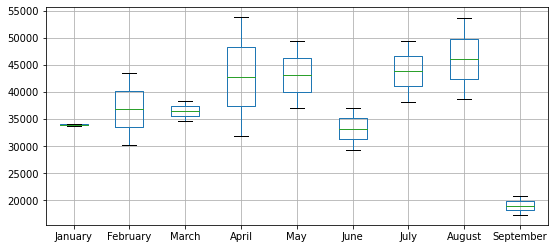

In [ ]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can easily detect the differences
# between different treatments
weekendDataset.boxplot(figsize = (9, 4))

From the above boxplot we can see that the data is normally distributed, and the variances for each month are almost equal. 

Now lets perform the ANOVA test for weekend data.

Null hypothesis: The mean step count for weekends for each month is not significantly different.

Alternate hypothesis: There is atleast one pair of months for which the mean step count for weekends is significantly different.

Assumptions:

• Data is normally distributed.

• Variances are equal between groups

• Observations are sampled independently from each other

We have proved above that the assumptions are met for this dataset.

Now, lets perform the ANOVA test.

In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(weekendDataset['January'], weekdayDataset['February'], weekdayDataset['March'], weekdayDataset['April'], weekdayDataset['May'], weekdayDataset['June'], weekdayDataset['July'], weekdayDataset['August'], weekdayDataset['September'])
print(fvalue, pvalue)

4.748163905342237 0.0003570344440247822


Since the p-value is less than 0.01 at 1% significanvce level, we will reject the null hypothesis that the means for step count during weekends are not significantly different.